****| RETO 3: MERCADOTECNIA TELEFÓNICA CON APRENDIZAJE SUPERVISADO |****

====================================================================

In [129]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Setup del entorno para importar módulos locales
import sys
import os
# Agregamos la ruta relativa a la carpeta 'src' para importar nuestros propios módulos
sys.path.append(os.path.abspath("../src"))

**1. Preparación del entorno y carga de los datos**

In [130]:
# Carga de los datos
data = pd.read_csv("../data/bank_marketing.csv")

In [131]:
data.head(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes
5,58,retired,married,secondary,no,8332,no,no,cellular,13,aug,740,4,-1,0,unknown,no
6,36,services,single,secondary,no,198,yes,no,cellular,11,may,496,1,-1,0,unknown,no
7,26,technician,single,secondary,no,1231,yes,no,cellular,3,jun,385,2,96,5,success,yes


In [132]:
# Dimensiones del dataframe
print("Número de registros:", data.shape[0])
print("Número de variables:", data.shape[1])

Número de registros: 9000
Número de variables: 17


In [133]:
# Tipos de variables
print("\nTipos de variables:")
print(data.dtypes)


Tipos de variables:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [134]:
# Datos faltantes
print("\nValores nulos por variable:")
print(data.isnull().sum())


Valores nulos por variable:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [135]:
# Descripción general de los datos
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,1482.262778,15.619556,353.832778,2.520111,50.511333,0.788889
std,11.664253,3031.013197,8.345305,336.945158,2.737758,107.691963,2.210273
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,109.000000,8.000000,131.000000,1.000000,-1.000000,0.000000
50%,39.000000,519.000000,15.000000,240.500000,2.000000,-1.000000,0.000000
75%,49.000000,1646.500000,21.000000,462.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3253.000000,58.000000,850.000000,58.000000


Identificamos las siguientes variables

***Numéricas:*** age, balance, day, duration, campaing, pdays, previous

***Categóricas:*** job, marital, education, default, housing, loan, contact, month, poutcome, y

___

**2. Procesamiento de variables**

Optamos por emplear **LabelEncoder** para:

*Variables con orden* **->** Existe una jerarquía lógica

Y **OneHotEncoder** para:

*Variables sin orden* **->** Para evitar introducir un orden 'ficticio' y sesgo en el modelo

In [136]:
# == Variable de salida == #
# Revisamos valores únicos de 'y'
print("Valores únicos en 'y':", data['y'].unique())
print("Distribución de 'y':")
print(data['y'].value_counts())

Valores únicos en 'y': ['yes' 'no']
Distribución de 'y':
y
no     5213
yes    3787
Name: count, dtype: int64


In [137]:
from preprocesamiento import codificar_variables

# Aplicamos todas las transformaciones de codificación
data_encoded = codificar_variables(data)

# Validamos el resultado
print("Shape del dataset procesado:", data_encoded.shape)
data_encoded.head()

Shape del dataset procesado: (9000, 41)


,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,31,3,0,2666,0,0,10,318,2,97,...,False,False,False,False,True,False,False,False,True,False
1,29,0,0,1584,0,0,6,245,1,-1,...,False,False,False,False,False,False,True,False,False,True
2,41,2,0,2152,1,0,17,369,1,-1,...,False,False,False,False,True,False,False,False,False,True
3,50,2,0,84,1,0,17,18,8,-1,...,True,False,False,False,False,False,False,False,False,True
4,40,2,0,0,0,0,28,496,2,182,...,True,False,False,False,False,False,False,False,True,False


In [138]:
# Hacemos una pequeña revisión
print("\nDefault:", data['default'].unique())
print("\nHousing:", data['housing'].unique())
print("\nLoan:",data['loan'].unique())

# Encoded
print("\nDefault:", data_encoded['default'].unique())
print("\nHousing:", data_encoded['housing'].unique())
print("\nLoan:",data_encoded['loan'].unique())


Default: ['no' 'yes']

Housing: ['no' 'yes']

Loan: ['no' 'yes']

Default: [0 1]

Housing: [0 1]

Loan: [0 1]


Quedaron correctamente codificadas tanto variables categóricas como binarias
____

**3. Escalado y partición de las variables**

Tanto la regresión logística como las redes neuronales son sensibles a la escala de las variables, por tanto:

Normalizamos o estandarizamos para reducir el sesgo

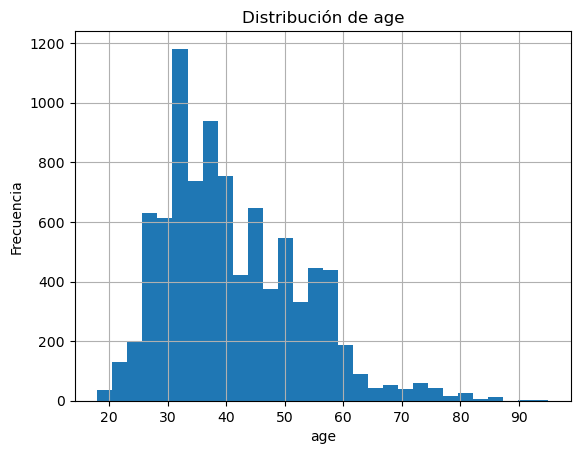

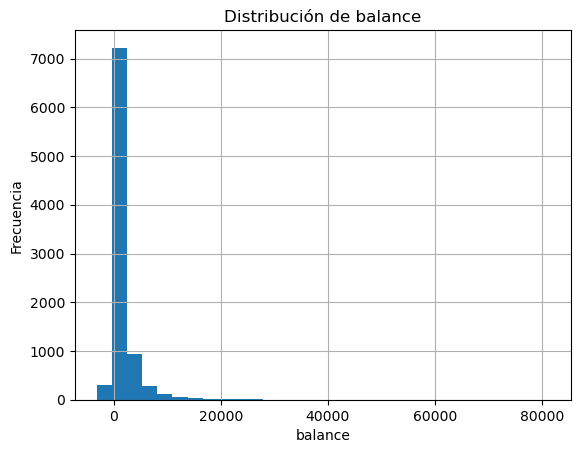

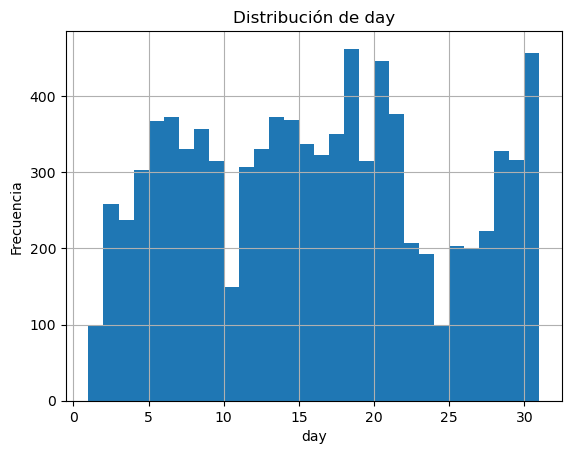

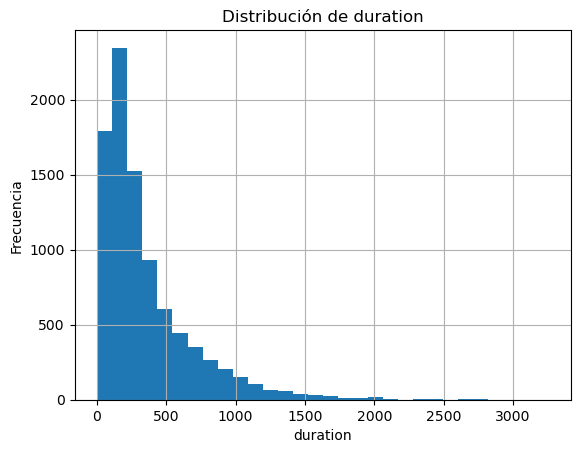

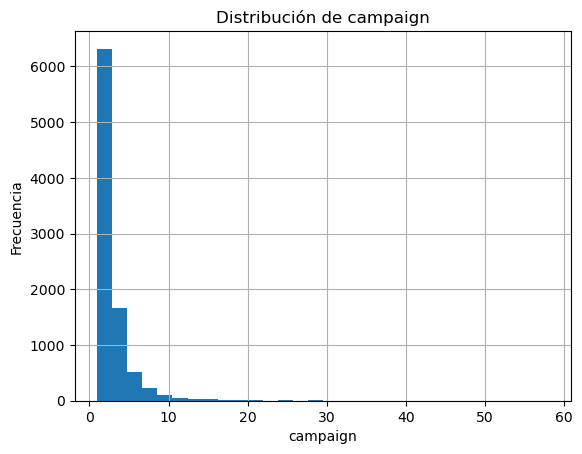

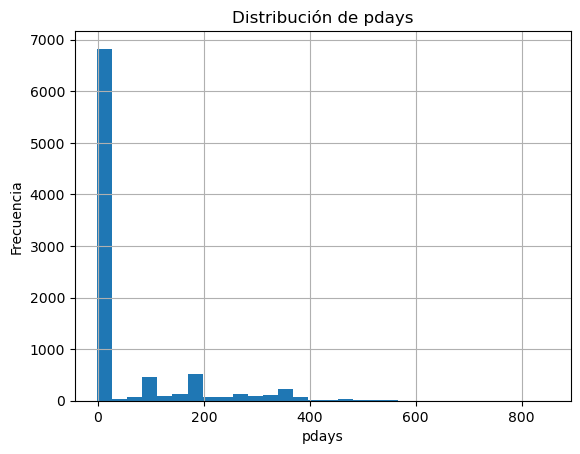

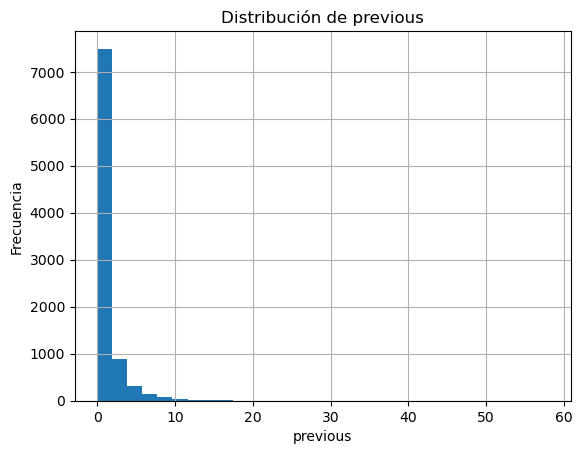

In [139]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in num_cols:
    plt.hist(data_encoded[col], bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

In [140]:
data_encoded[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,1482.262778,15.619556,353.832778,2.520111,50.511333,0.788889
std,11.664253,3031.013197,8.345305,336.945158,2.737758,107.691963,2.210273
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,109.000000,8.000000,131.000000,1.000000,-1.000000,0.000000
50%,39.000000,519.000000,15.000000,240.500000,2.000000,-1.000000,0.000000
75%,49.000000,1646.500000,21.000000,462.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3253.000000,58.000000,850.000000,58.000000


Para el escalado determinamos que es mejor emplear la **Estandarización (*StandardScaler*)**, debido a que observamos distribuciones y/o valores negativos altos. Para el caso, escalaremos -> ['balance', 'duration', 'previous', 'age', 'campaign']

No escalaremos -> ['day', 'pdays'] + todas las dummies de variables categóricas

Desistiremos de emplear MinMaxScaler debido a su sensibilidad a los outliers

Primero comenzaremos con la partición de los datos para evitar incluir los datos de prueba en los de entrenamiento (*data leakage*)

In [141]:
# ==== 1) Partición de los datos ==== #
# Separamos variables de entrada (X) y variable objetivo (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

In [142]:
# Hacemos la división en 60/20/20 (80% train+validation y 20% test) -> train_test_split

# A) Separar primero el conjunto de prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# 'stratify=y' para conservar el mismo porcentaje de y (evitar desbalanceo)

In [143]:
# B) De lo que quedó (80%), separar 75% para train (60% total), 25% para val (20% total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# 'y_temp' es el 80% de los datos originales después de separar el test

In [144]:
# Verificamos los tamaños:
print("\nTrain:", X_train.shape)
print("\nVal:  ", X_val.shape)
print("\nTest: ", X_test.shape)


Train: (5400, 40)

Val:   (1800, 40)

Test:  (1800, 40)


In [145]:
print("Distribución del conjunto de entrenamiento (y_train):\n", y_train.value_counts(normalize=True))

Distribución del conjunto de entrenamiento (y_train):
 y
0    0.579259
1    0.420741
Name: proportion, dtype: float64


In [146]:
# ==== Escalamiento de los datos ==== #
# Seleccionamos columnas a escalar
cols_to_scale = ['age','balance', 'duration', 'campaign', 'previous']

In [147]:
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale]) # Ajustamos SOLO con X_train

StandardScaler()

In [148]:
# Transformar 'X_train', 'X_val', 'X_test' usando el mismo scaler
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [149]:
X_train = X_train.copy()
X_val = X_val.copy()
X_test = X_test.copy()

**scaler.fit(X_train)**	-> Aprende solo de los datos que el modelo entrena

**scaler.transform(X_val/test)** -> Aplicamos la misma escala sin reentrenar el escalador

___

**4. Modelado y validación**

Contruiremos los 2 modelos de clasificación binaria y comparar su rendimiento:
***Regresión Logística***
***Red Neuronal (MLPClassifier)***

In [150]:
# ==== Modelo de Regresión Logística ==== #

# Creamos el modelo
log_model = LogisticRegression(max_iter=3000, random_state=42)

In [151]:
# Entrenamos con el conjunto de entrenamiento ('X_train', 'y_train')
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=42)

In [152]:
# Ahora predecimos sobre el conjunto de validación
y_val_pred = log_model.predict(X_val)

In [153]:
# Calculamos la precisión
acc = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en validación: {acc:.4f}") # colocamos formato decimal en el f-string

Accuracy en validación: 0.8256


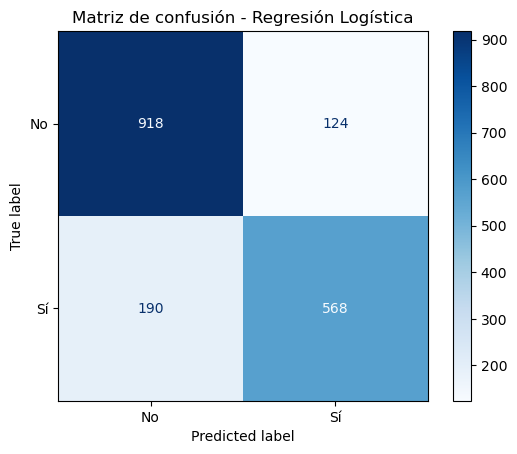

In [154]:
# Matriz de confusión
cm = confusion_matrix(y_val, y_val_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Sí"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Regresión Logística")
plt.grid(False)
plt.savefig("../outputs/matriz_confusion_logistica.png", dpi=300)
plt.show()

Verdaderos negativos: 918

Falsos positivos: 124

Falsos negativos: 190

Verdaderos positivos: 568

In [155]:
# ==== Redes Neuronales ==== #
# Definimos el modelo
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 5), # 2 capas ocultas con 10 y 5 neuronas
    max_iter=500, 
    random_state=42,
    alpha=0.001, # parámetro de regularización L2 para evitar sobreajuste (penalizamos los pesos grandes)
    learning_rate_init=0.001 # tasa inicial de aprendizaje
)

In [156]:
# Entrenamos
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(10, 5), max_iter=500,
              random_state=42)

In [157]:
# Predecimos
y_val_pred_mlp = mlp.predict(X_val)

In [158]:
# Evaluamos
acc_mlp = accuracy_score(y_val, y_val_pred_mlp)
print(f"Accuracy en validación (Red Neuronal): {acc_mlp:.4f}")

Accuracy en validación (Red Neuronal): 0.8250


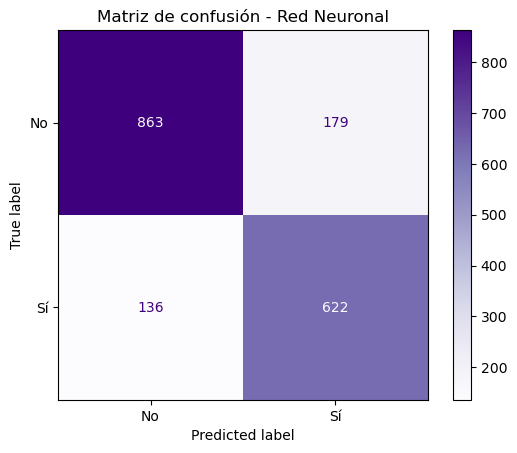

In [159]:
# Matriz de confusión
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=["No", "Sí"])
disp.plot(cmap="Purples")
plt.title("Matriz de confusión - Red Neuronal")
plt.grid(False)
plt.savefig("../outputs/matriz_confusion_mlp.png", dpi=300)
plt.show()

Ambos modelos tienen un desempeño general parecido

La Red Neuronal detecta mejor los “sí” → tiene menos falsos negativos

La Regresión Logística predice mejor los “no” → tiene menos falsos positivos

Determinamos que, aunque ambos tengan un accuracy muy parecido, la *red neuronal* es mejor porque **detecta más clientes interesados**

Es decir, no detectar a alguien que sí aceptaría la oferta (falso negativo) es más costoso que llamar a alguien y que diga “no” (falso positivo)
___

**5. Evaluación final y conclusiones**

Seleccionaremos el mejor modelo (Red Neuronal)

Lo evaluamos en el conjunto de prueba (X_test), conjunto que no ha sido visto por el modelo

In [160]:
# Predecimos con MLP
y_test_pred = mlp.predict(X_test)

In [161]:
# Accuracy final en prueba
acc_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en prueba (Red Neuronal): {acc_test:.4f}")

Accuracy en prueba (Red Neuronal): 0.8333


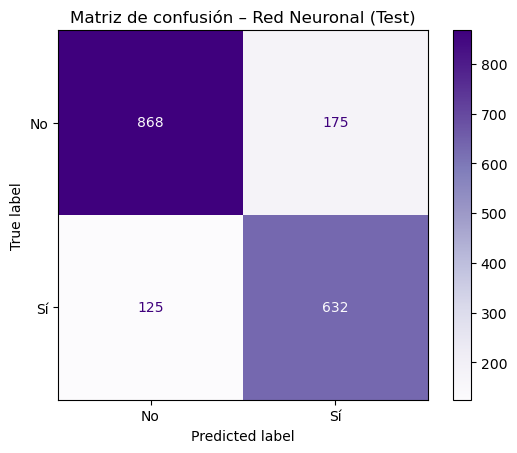

In [162]:
# Matriz de confusión
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["No", "Sí"])
disp.plot(cmap="Purples")
plt.title("Matriz de confusión – Red Neuronal (Test)")
plt.grid(False)
plt.savefig("../outputs/matriz_confusion_test_mlp.png", dpi=300)
plt.show()